In [1]:
import pandas as pd
import numpy as np 

import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

/home/abhishek/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhishek/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('train.csv',nrows= 50000)
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
#inly selecting numerical values 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32','float64']
cols = list(data.select_dtypes(include=numerics).columns)
data = data[cols]

data.shape

(50000, 114)

In [7]:
X_train , X_test, y_train , y_test = train_test_split(
    data.drop(labels= ['ID', 'target'], axis=1 ),data['target'],test_size = 0.3, random_state = 0 )

In [8]:
mi = mutual_info_classif(X_train.fillna(0), y_train)

In [9]:
mi

array([0.00099491, 0.00494384, 0.00580359, 0.0058663 , 0.0047232 ,
       0.00531463, 0.00484587, 0.00509679, 0.02452174, 0.00410594,
       0.01731067, 0.00621309, 0.02186593, 0.00363817, 0.00464228,
       0.0016519 , 0.        , 0.00605243, 0.00057847, 0.01165031,
       0.        , 0.00557634, 0.00459292, 0.00193687, 0.00497969,
       0.00468507, 0.00388935, 0.00431967, 0.00847069, 0.00449464,
       0.00287783, 0.00386304, 0.00468149, 0.00544806, 0.00713472,
       0.00338878, 0.0051993 , 0.00497135, 0.00704997, 0.00605364,
       0.00421967, 0.00153838, 0.00420006, 0.03905016, 0.00256357,
       0.00221939, 0.00517272, 0.00352848, 0.00420793, 0.00465039,
       0.00463745, 0.00445031, 0.00212873, 0.01496547, 0.00598698,
       0.00305051, 0.00759938, 0.00271143, 0.        , 0.00399213,
       0.00292215, 0.00887443, 0.00544214, 0.00427168, 0.0057278 ,
       0.00187598, 0.00406948, 0.00270638, 0.00695059, 0.00132018,
       0.00527936, 0.0019545 , 0.00107944, 0.00291567, 0.00368

In [10]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False)

v50     0.039050
v10     0.024522
v14     0.021866
v12     0.017311
v62     0.014965
v21     0.011650
v129    0.010685
v114    0.009920
v72     0.008874
v34     0.008471
v65     0.007599
v120    0.007258
v40     0.007135
v44     0.007050
v103    0.007028
v101    0.007014
v82     0.006951
v123    0.006599
v117    0.006496
v130    0.006433
v13     0.006213
v45     0.006054
v19     0.006052
v128    0.006033
v63     0.005987
v5      0.005866
v4      0.005804
v100    0.005764
v77     0.005728
v93     0.005720
          ...   
v94     0.003126
v108    0.003096
v98     0.003094
v64     0.003051
v70     0.002922
v87     0.002916
v36     0.002878
v67     0.002711
v81     0.002706
v51     0.002564
v121    0.002546
v53     0.002219
v61     0.002129
v85     0.001955
v27     0.001937
v78     0.001876
v17     0.001652
v48     0.001538
v83     0.001320
v86     0.001079
v1      0.000995
v102    0.000902
v124    0.000630
v20     0.000578
v68     0.000000
v18     0.000000
v96     0.000000
v97     0.0000

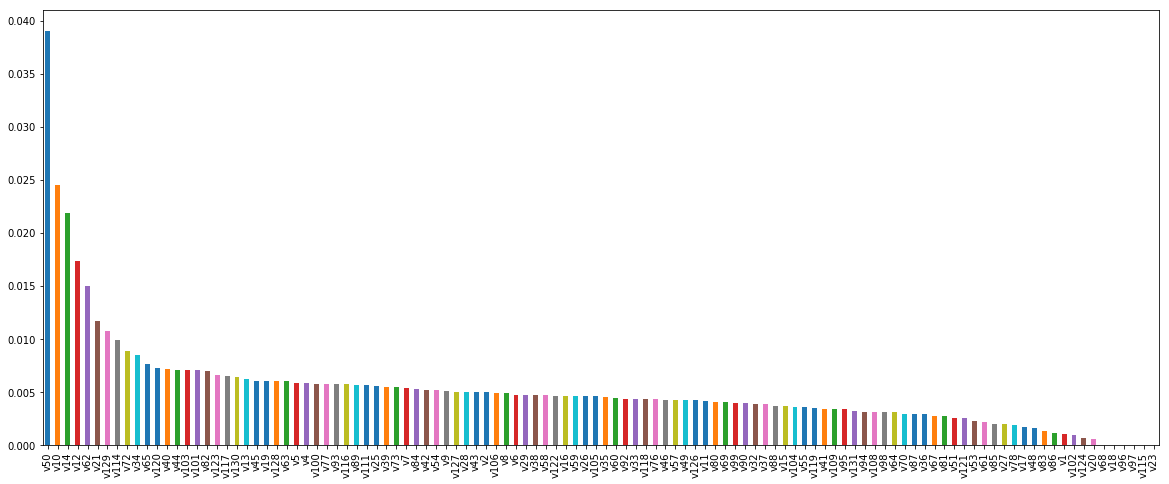

In [11]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [13]:
sel_ = SelectKBest(mutual_info_classif, k=15).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v40', 'v46', 'v50', 'v62', 'v64',
       'v100', 'v103', 'v105', 'v114', 'v129'],
      dtype='object')